In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# read dataset 
store_df = pd.read_csv('Store1.csv')

# EDA - STORE TABLE

In [33]:
store_df.head(10)

,Observation,NearMetro,StoreArea,ItemsAvailable,Parking,CouponCategory,StoreSales
0,1,N,1015,910,NP,CAT C,31180
1,2,N,15000,940,NP,CAT C,150000
2,3,N,909,980,OP,CAT C,33739
3,4,Y,1108,970,OP,CAT C,35748
4,5,Y,954,1010,NP,CAT C,38530
5,6,N,1165,990,NP,CAT A,38620
6,7,N,1232,1110,OP,CAT C,39473
7,8,Y,1207,1109,OP,CAT A,39615
8,9,N,1026,1142,OP,CAT C,40174
9,10,N,1286,1128,OP,CAT C,40955


In [34]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
Observation       140 non-null int64
NearMetro         140 non-null object
StoreArea         140 non-null int64
ItemsAvailable    140 non-null int64
Parking           140 non-null object
CouponCategory    140 non-null object
StoreSales        140 non-null int64
dtypes: int64(4), object(3)
memory usage: 7.8+ KB


In [35]:
store_df.describe()

,Observation,StoreArea,ItemsAvailable,StoreSales
count,140.0000,140.000000,140.000000,140.000000
mean,70.5000,1535.364286,1658.771429,67220.028571
std,40.5586,1171.876397,332.824112,16951.012051
min,1.0000,896.000000,910.000000,31180.000000
25%,35.7500,1245.750000,1432.250000,55126.000000
50%,70.5000,1444.000000,1706.500000,68183.500000
75%,105.2500,1607.250000,1896.250000,78992.750000
max,140.0000,15000.000000,2374.000000,150000.000000


## UNIVARIATE ANALYSIS

### VARIABLE : COUPON CATEGORY

In [21]:
CouponCategoryData = store_df["CouponCategory"]

In [23]:
store_df["CouponCategory"].unique()

array(['CAT C', 'CAT A', 'CAT B'], dtype=object)

In [24]:
store_df['CouponCategory'].value_counts()

CAT A    86
CAT C    51
CAT B     3
Name: CouponCategory, dtype: int64

### VARIABLE : NEAR METRO

In [25]:
store_df['NearMetro'].value_counts()

N    87
Y    53
Name: NearMetro, dtype: int64

In [11]:
store_df['Parking'].value_counts()

OP    90
NP    50
Name: Parking, dtype: int64

### VARIABLE : STORE SALES

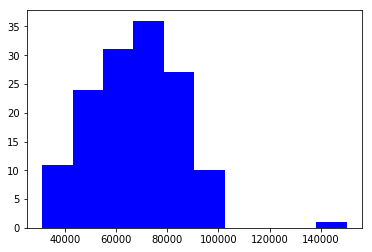

In [40]:
plt.hist(store_df['StoreSales'], bins = 10, color = "blue")
plt.show()

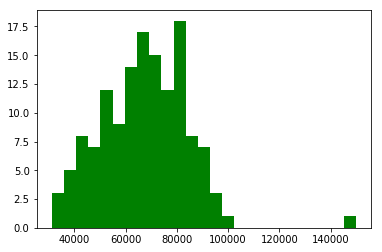

In [41]:
plt.hist(store_df['StoreSales'], bins = 25, color = "green")
plt.show()

In [46]:
store_df.query('StoreSales > 140000')

,Observation,NearMetro,StoreArea,ItemsAvailable,Parking,CouponCategory,StoreSales
1,2,N,15000,940,NP,CAT C,150000


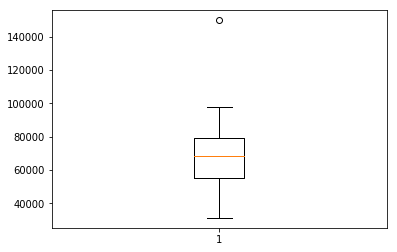

In [42]:
plt.boxplot(store_df['StoreSales'])
plt.show()

#### OBSERVATIONS
* There is one stores showing way more sales than the rest of the stores
* First cluster of stores looks evenly distributed

### VARIABLE : STORE AREA

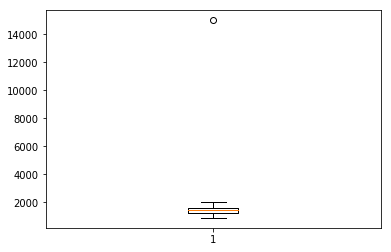

In [36]:
plt.boxplot(store_df['StoreArea'])
plt.show()

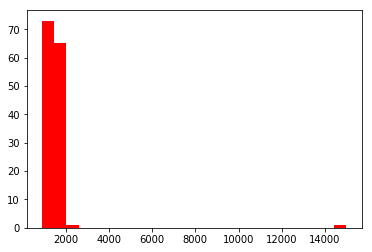

In [48]:
plt.hist(store_df['StoreArea'], bins = 25, color = "red")
plt.show()

In [49]:
store_df.query('StoreArea > 14000')

,Observation,NearMetro,StoreArea,ItemsAvailable,Parking,CouponCategory,StoreSales
1,2,N,15000,940,NP,CAT C,150000


#### OBSERVATIONS
* There is one stores having way more area than the rest
* This is the same store with outlier sales figures

#### INFERENCE
* This mega store should be removed from the analysis

## MULTIVARIATE ANALYSIS

In [50]:
# REMOVING THE STORE
store_df.query('StoreArea < 14000', inplace = True)

### VARIABLE : STORE SALES - PARKING

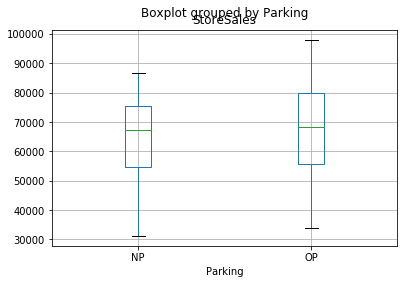

In [51]:
store_df.boxplot("StoreSales",by='Parking')
plt.show()

### VARIABLE : STORE SALES - COUPON CATEGORY

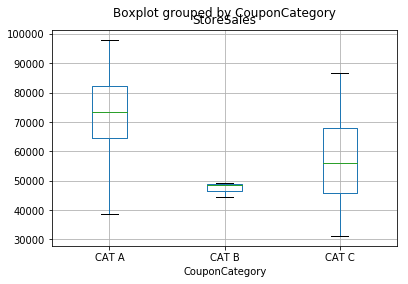

In [52]:
store_df.boxplot("StoreSales",by='CouponCategory')
plt.show()

### VARIABLE : STORE SALES - NEAR METRO

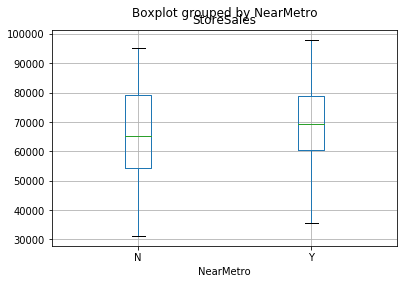

In [53]:
store_df.boxplot("StoreSales",by='NearMetro')
plt.show()

In [58]:
#store_df.groupby('Parking').describe().T
store_df.groupby('Parking').mean()

,Observation,StoreArea,ItemsAvailable,StoreSales
Parking,,,,
NP,67.448980,1437.734694,1634.897959,64927.142857
OP,72.922222,1438.911111,1679.755556,67548.600000
